En esta libreta de Jupiter vamos a estudiar mediante boxplots, como podemos estudiar los tiempos de vuelta de cada circuito y de cada neumático en cada circuito.

Estos son los boxplots de los tiempos de vuelta en los diferentes circuitos:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

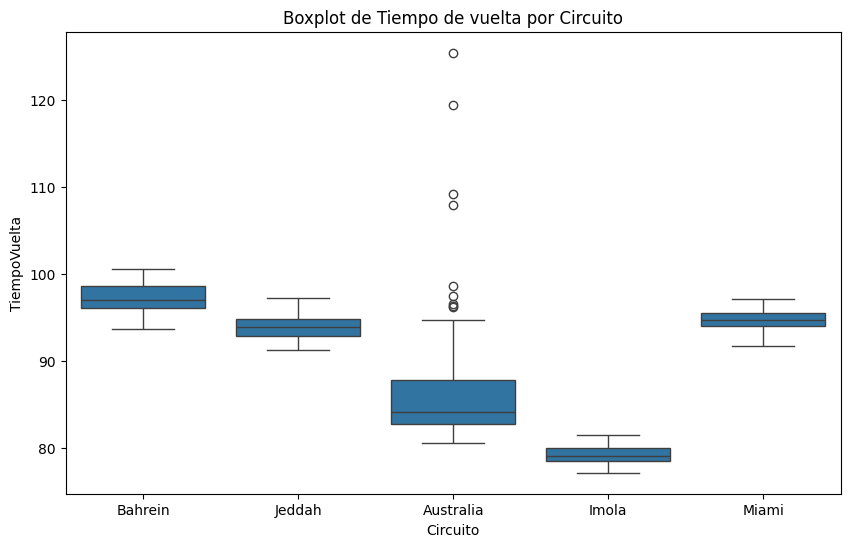

In [34]:

# Boxplot por clases (por ejemplo, 'Survived')
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Circuito', y='TiempoVuelta', data=df)
titulo = "Boxplot de Tiempo de vuelta por Circuito"
plt.title(titulo)
plt.show()



A continuacion vamos a ver de cada circuito los boxplots de los tiempos de vuelta para los diferentes neumáticos que se hayan utilizado.

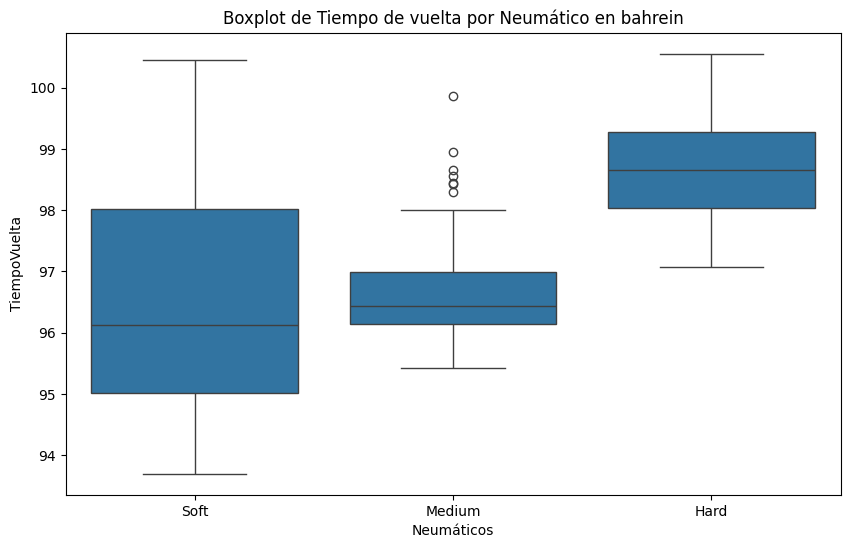

In [40]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

df_barein = df[df['Circuito'] == 'Bahrein']

# Boxplot por clases 
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Neumáticos', y='TiempoVuelta', data=df_barein)
titulo = "Boxplot de Tiempo de vuelta por Neumático en bahrein"
plt.title(titulo)
plt.show()

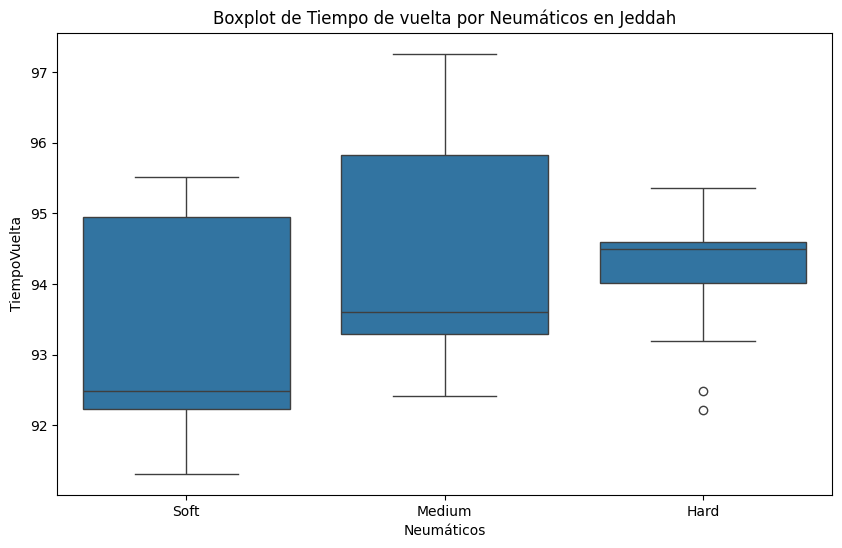

In [41]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

df_jeddah = df[df['Circuito'] == 'Jeddah']

# Boxplot por clases 
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Neumáticos', y='TiempoVuelta', data=df_jeddah)
titulo = "Boxplot de Tiempo de vuelta por Neumáticos en Jeddah"
plt.title(titulo)
plt.show()

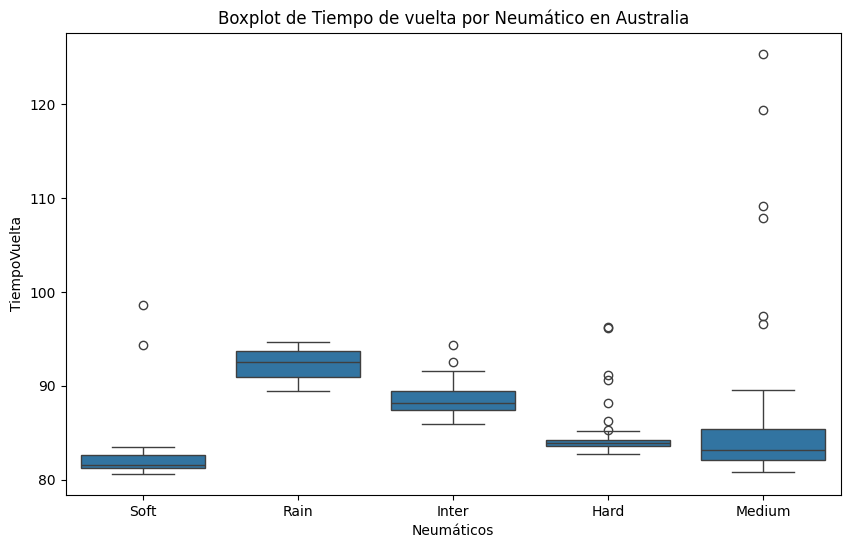

In [42]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

df_australia = df[df['Circuito'] == 'Australia']

# Boxplot por clases 
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Neumáticos', y='TiempoVuelta', data=df_australia)
titulo = "Boxplot de Tiempo de vuelta por Neumático en Australia"
plt.title(titulo)
plt.show()

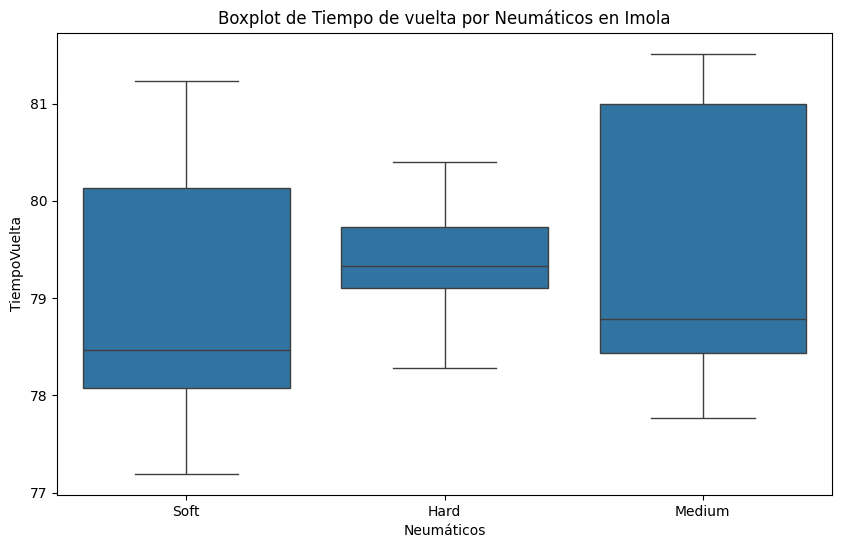

In [43]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

df_imola = df[df['Circuito'] == 'Imola']

# Boxplot por clases 
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Neumáticos', y='TiempoVuelta', data=df_imola)
titulo = "Boxplot de Tiempo de vuelta por Neumáticos en Imola"
plt.title(titulo)
plt.show()

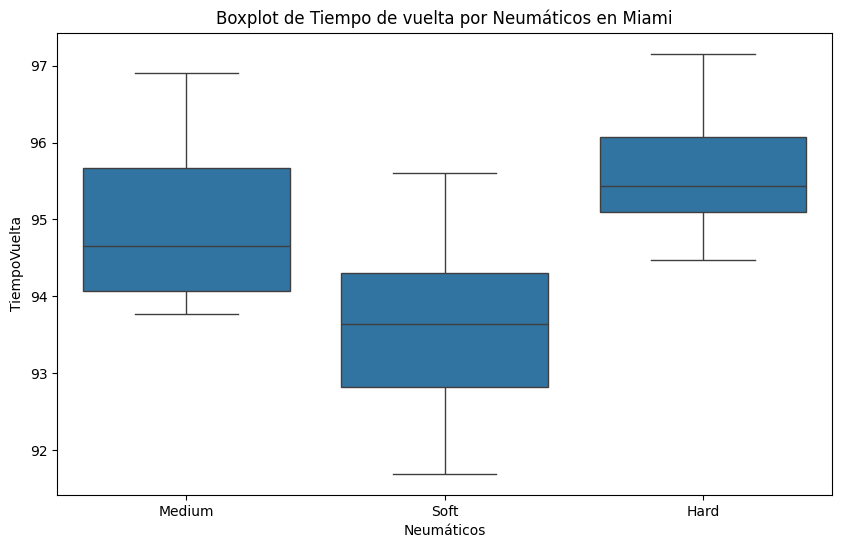

In [44]:
df = pd.read_csv('Datasets/240310F1_Dataset.csv')

df_Miami = df[df['Circuito'] == 'Miami']

# Boxplot por clases 
plt.figure(figsize=(10, 6))
bp = sns.boxplot(x='Neumáticos', y='TiempoVuelta', data=df_Miami)
titulo = "Boxplot de Tiempo de vuelta por Neumáticos en Miami"
plt.title(titulo)
plt.show()

Ahora vamos a ver una matriz de correlación para ver las relaciones de cada atributo con el resto.

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Ruta al archivo CSV
archivo_csv = 'Datasets/240309F1_Dataset.csv'
encoder = LabelEncoder()
# Leer el archivo CSV
df_F1 = pd.read_csv(archivo_csv)


df_F1.drop('DesgasteVuelta', axis=1, inplace=True)
df_F1.drop('Clima', axis=1, inplace=True)
df_F1.drop('TemperaturaPista', axis=1, inplace=True)

encoder = LabelEncoder()
df_F1['Piloto'] = encoder.fit_transform(df_F1['Piloto'])

fuel_discretizer = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
Wheel_life_discretizer = KBinsDiscretizer(n_bins = 6, encode='ordinal', strategy='uniform')
Trust_Discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#Water_Discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

#df_F1['CargaCombustible'] = fuel_discretizer.fit_transform(df_F1[['CargaCombustible']])
#df_F1['VidaNeumatico'] = Wheel_life_discretizer.fit_transform(df_F1[['VidaNeumatico']])
df_F1['ConfianzaPilotoCoche'] = Trust_Discretizer.fit_transform(df_F1[['ConfianzaPilotoCoche']])
df_F1['ConfianzaPilotoPista'] = Trust_Discretizer.fit_transform(df_F1[['ConfianzaPilotoPista']])
#df_F1['CantidadAgua'] = Water_Discretizer.fit_transform(df_F1[['CantidadAgua']])

df_F1.dropna(inplace=True)

# Eliminar filas donde 'SafetyCar' es True
df_F1 = df_F1[df_F1['SafetyCar'] == False]
df_F1.drop('SafetyCar', axis=1, inplace=True)


# Eliminar filas donde haya trafico ya que no son representativas.
df_F1 = df_F1[df_F1['Trafico'] == False]
df_F1.drop('Trafico', axis=1, inplace=True)


df_F1 = pd.get_dummies(df_F1, columns = ['Circuito'] )
df_F1 = pd.get_dummies(df_F1, columns = ['Neumáticos'] )
df_F1 = pd.get_dummies(df_F1, columns = ['ModoPilotaje'] )
df_F1 = pd.get_dummies(df_F1, columns = ['GomaEnPista'] )
df_F1 = pd.get_dummies(df_F1, columns = ['AgarreAsfalto'] )



/Users/javice/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/javice/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [49]:
# Selecting the 'CargaCombustible' column
carga_combustible = df_F1['CargaCombustible'].values.reshape(-1, 1)

min_max_scaler = MinMaxScaler()
carga_combustible_minmax = min_max_scaler.fit_transform(carga_combustible)

df_F1['CargaCombustible'] = carga_combustible_minmax


# Selecting the 'VidaNeumatico' column
Vida_neumatico = df_F1['VidaNeumatico'].values.reshape(-1, 1)

vida_neumatico_min_max = min_max_scaler.fit_transform(Vida_neumatico)

df_F1['VidaNeumatico'] = vida_neumatico_min_max


# Selecting the 'CantidadAgua' column
Cantidad_Agua = df_F1['CantidadAgua'].values.reshape(-1, 1)

Cantidad_Agua_min_max = min_max_scaler.fit_transform(Cantidad_Agua)

df_F1['CantidadAgua'] = Cantidad_Agua_min_max


X = df_F1.drop('TiempoVuelta', axis=1)
print(X)
Y = df_F1[['TiempoVuelta']]

      Entrenamientos  CargaCombustible  Sobrecalentamiento  VidaNeumatico  \
0               True          0.405180               False       0.955224   
1               True          0.318224               False       0.955224   
2               True          0.387604               False       0.895522   
3               True          0.299722               False       0.895522   
4               True          0.370953               False       0.835821   
...              ...               ...                 ...            ...   
1407            True          0.056429               False       0.477612   
1408            True          0.037928               False       0.432836   
1409            True          0.037928               False       0.417910   
1410            True          0.023127               False       0.373134   
1411            True          0.023127               False       0.358209   

      CantidadAgua  ConfianzaPilotoPista  ConfianzaPilotoCoche  Piloto  \
0